In [239]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import KBinsDiscretizer

In [221]:
data = pd.read_csv('archive/cleaned_cervical_cancer_data.csv')

First, we split the data we want to discretize.

In [222]:
numerical_columns = [
    "Age",
    "Number of sexual partners",
    "First sexual intercourse",
    "Num of pregnancies",
    "Smokes (years)",
    "Smokes (packs/year)",
    "Hormonal Contraceptives (years)",
    "IUD (years)",
    "STDs (number)",
    "STDs: Number of diagnosis",
]

numerical_data = data[numerical_columns]
categorical_data = data.drop(columns=numerical_columns)

numerical_data.shape, categorical_data.shape

total_data = pd.concat([numerical_data, categorical_data], axis=1)


😔 Sadly this next section yielded bad results, we need to manually discretize.

In [223]:
# def discretize(data):
#     discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
#     return discretizer.fit_transform(data)

# discretized_data = discretize(numerical_data)
# discretized_data = pd.DataFrame(discretized_data, columns=numerical_columns)


# discretized_data = pd.concat([discretized_data, categorical_data], axis=1)
# final_data = pd.DataFrame(discretized_data)
# final_data

In [224]:
# transactions =  []
# for i in range(0, len(data)):
#     transactions.append([str(data.values[i, j]) for j in range(0, data.shape[1])])


# results = apriori(
#     transactions,
#     min_support=0.003,
#     min_confidence=0.2,
#     min_lift=3,
#     min_length=2,
#     max_length=2,
# )


# def organize(results):
#     lado_izq = [tuple(resultado[2][0][0])[0] for resultado in results]
#     lado_der = [tuple(resultado[2][0][1])[0] for resultado in results]
#     supports = [resultado[1] for resultado in results]
#     confidences = [resultado[2][0][2] for resultado in results]
#     lifts = [resultado[2][0][3] for resultado in results]
#     return list(zip(lado_izq, lado_der, supports, confidences, lifts))


# df_resultados = pd.DataFrame(
#     organize(results),
#     columns=["Lado Izquierdo", "Lado Derecho", "Support", "Confidence", "Lift"],
# )

# df_resultados = df_resultados.sort_values(by="Lift", ascending=False)
# df_resultados.head(10)

First we get a sense of the number of bins/ranges we should divide our data in. 

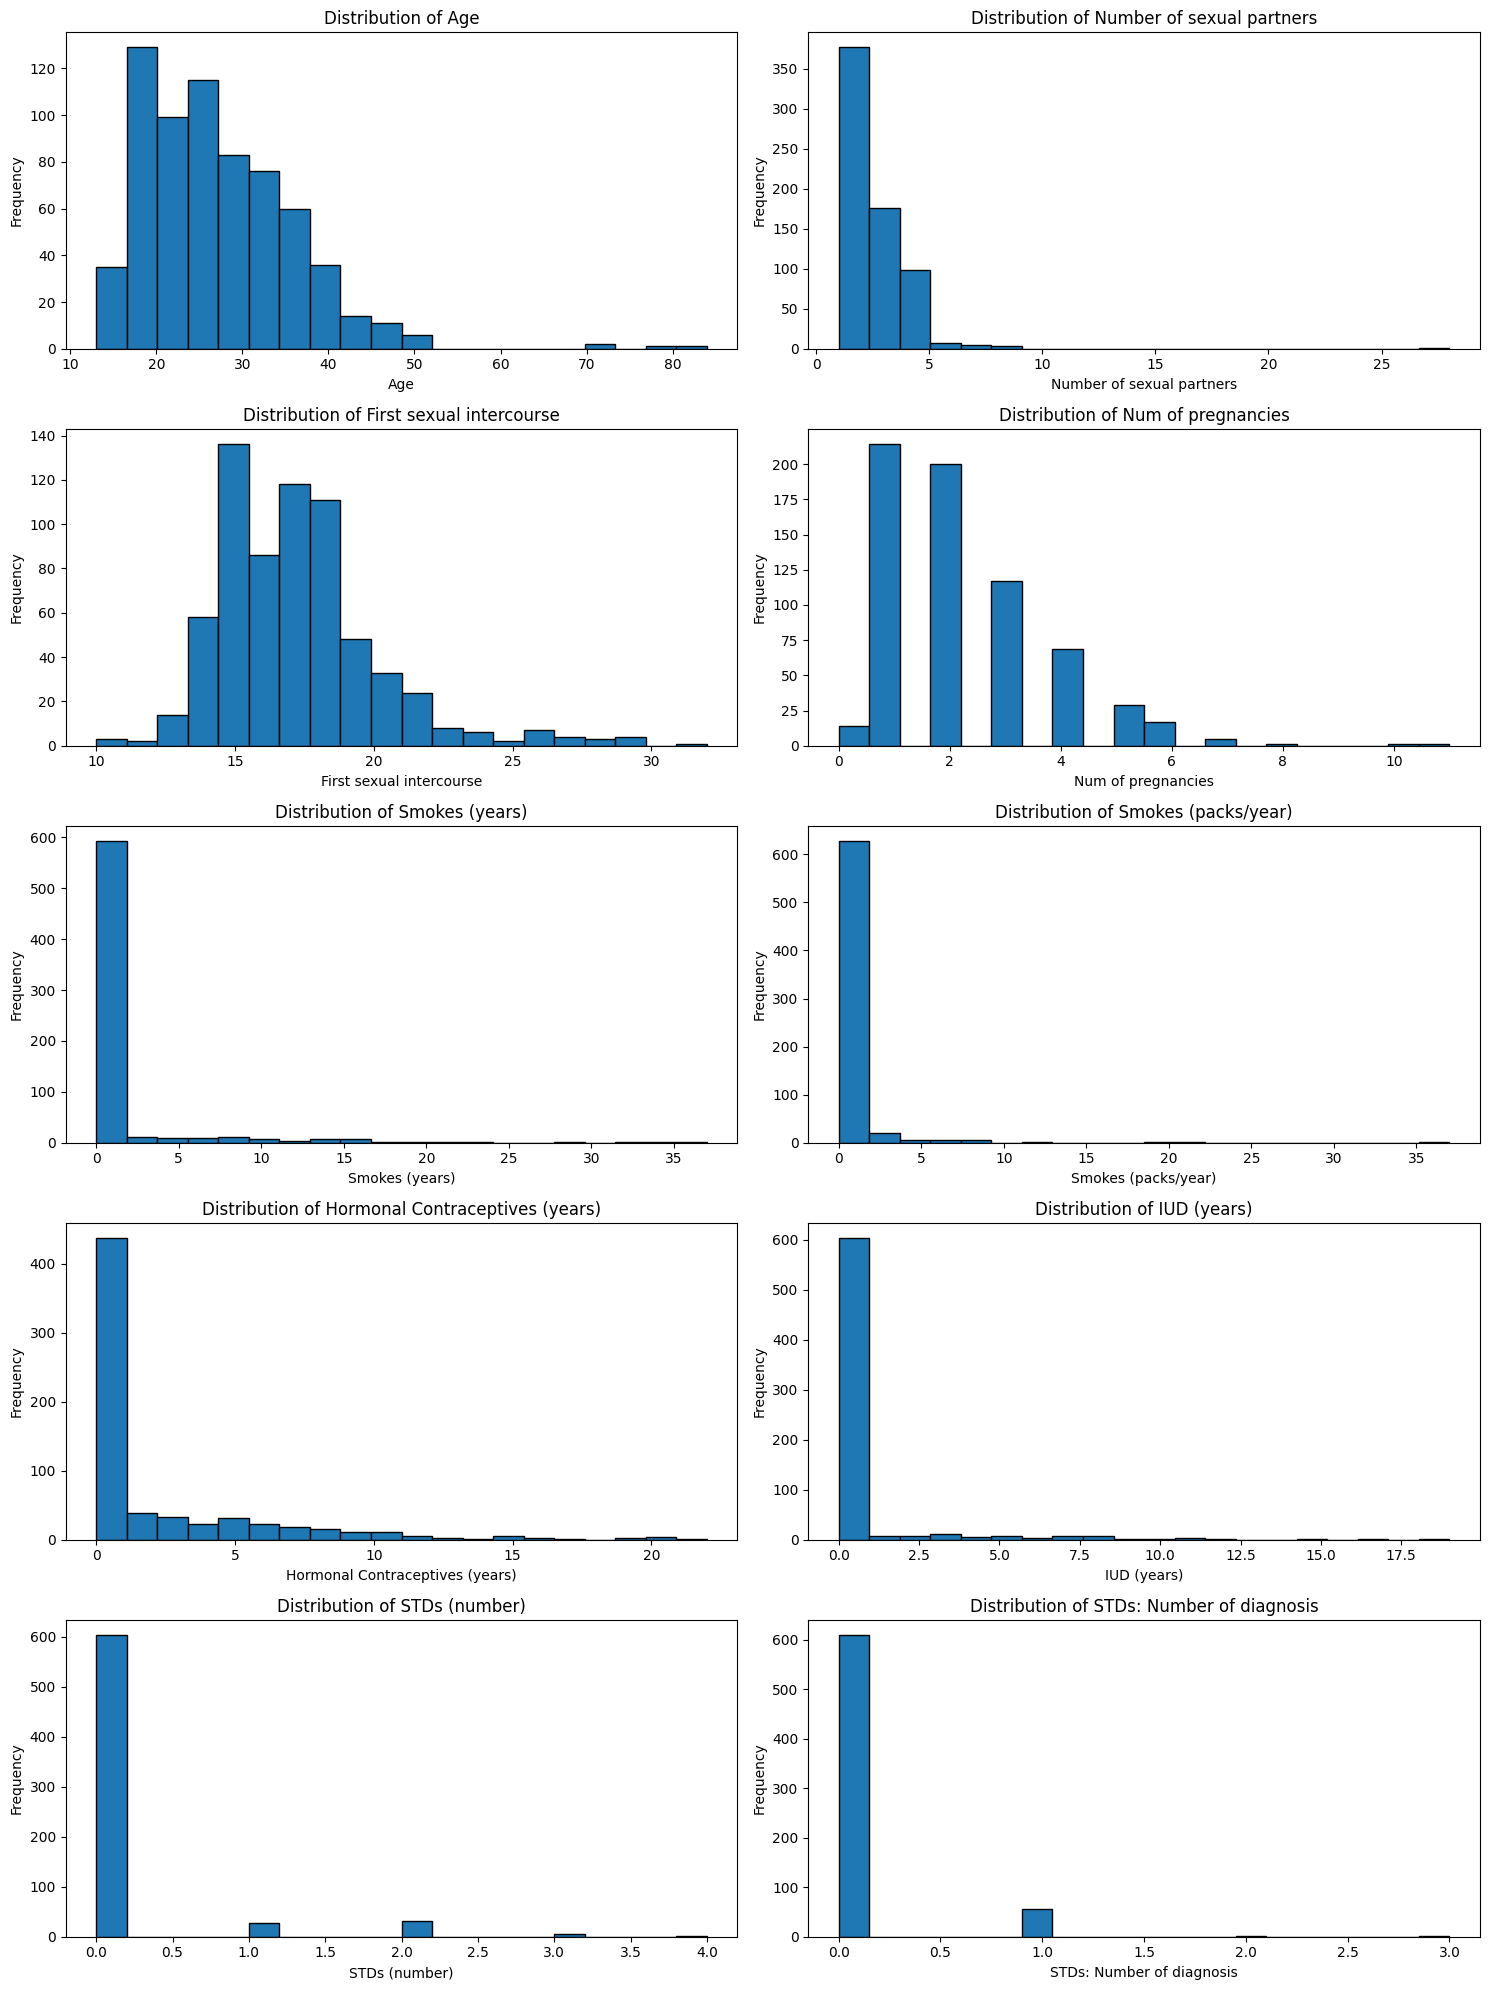

Frequency Table for Age
            Bin  Frequency
0   13.00-16.55       35.0
1   16.55-20.10      129.0
2   20.10-23.65       99.0
3   23.65-27.20      115.0
4   27.20-30.75       83.0
5   30.75-34.30       76.0
6   34.30-37.85       60.0
7   37.85-41.40       36.0
8   41.40-44.95       14.0
9   44.95-48.50       11.0
10  48.50-52.05        6.0
11  52.05-55.60        0.0
12  55.60-59.15        0.0
13  59.15-62.70        0.0
14  62.70-66.25        0.0
15  66.25-69.80        0.0
16  69.80-73.35        2.0
17  73.35-76.90        0.0
18  76.90-80.45        1.0
19  80.45-84.00        1.0


Frequency Table for Number of sexual partners
            Bin  Frequency
0     1.00-2.35      377.0
1     2.35-3.70      176.0
2     3.70-5.05       98.0
3     5.05-6.40        7.0
4     6.40-7.75        5.0
5     7.75-9.10        4.0
6    9.10-10.45        0.0
7   10.45-11.80        0.0
8   11.80-13.15        0.0
9   13.15-14.50        0.0
10  14.50-15.85        0.0
11  15.85-17.20        0.0
12  17.20-

In [245]:
from matplotlib import pyplot as plt
def plot_histograms_and_get_frequencies(data, columns):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
    axes = axes.flatten()
    frequency_tables = {}

    for ax, col in zip(axes, columns):
        # Plot histogram
        counts, bin_edges, _ = ax.hist(data[col], bins=20, edgecolor="k")
        ax.set_title(f"Distribution of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")

        # Generate frequency table
        bin_labels = [
            f"{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}"
            for i in range(len(bin_edges) - 1)
        ]
        frequency_table = pd.DataFrame({"Bin": bin_labels, "Frequency": counts})
        frequency_tables[col] = frequency_table
        

    plt.tight_layout()
    plt.show()

    return frequency_tables


# Generate histograms and frequency tables for numerical data
frequency_tables = plot_histograms_and_get_frequencies(
    numerical_data, numerical_columns
)

# Display frequency tables
for col, table in frequency_tables.items():
    print(f"Frequency Table for {col}")
    print(table)
    print("\n")

Now, we can use the `qcut` function to discretize the data. Remember, we are basing this on the previous histograms, the bins are chosen arbitrarily and could be improved.


/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_68082/3455700781.py:52: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  discretized_data = discretized_data.applymap(str)


     Age Number of sexual partners First sexual intercourse  \
0  13-20                       2-4              10-15 years   
1  13-20                       1-2              10-15 years   
2    nan                       4-6              15-18 years   
3  40-50                       2-4              18-21 years   
4  40-50                       2-4                21+ years   

  Num of pregnancies Smokes (years) Smokes (packs/year)  \
0     No pregnancies      0-2 years      0-2 packs/year   
1     No pregnancies      0-2 years      0-2 packs/year   
2     3+ pregnancies      10+ years      10+ packs/year   
3     3+ pregnancies      0-2 years      0-2 packs/year   
4        1 pregnancy      0-2 years      0-2 packs/year   

  Hormonal Contraceptives (years)    IUD (years) STDs (number)  \
0                    0-2 years HC  0-2 years IUD       No STDs   
1                    0-2 years HC  0-2 years IUD       No STDs   
2                    2-5 years HC  0-2 years IUD       No STDs   
3 

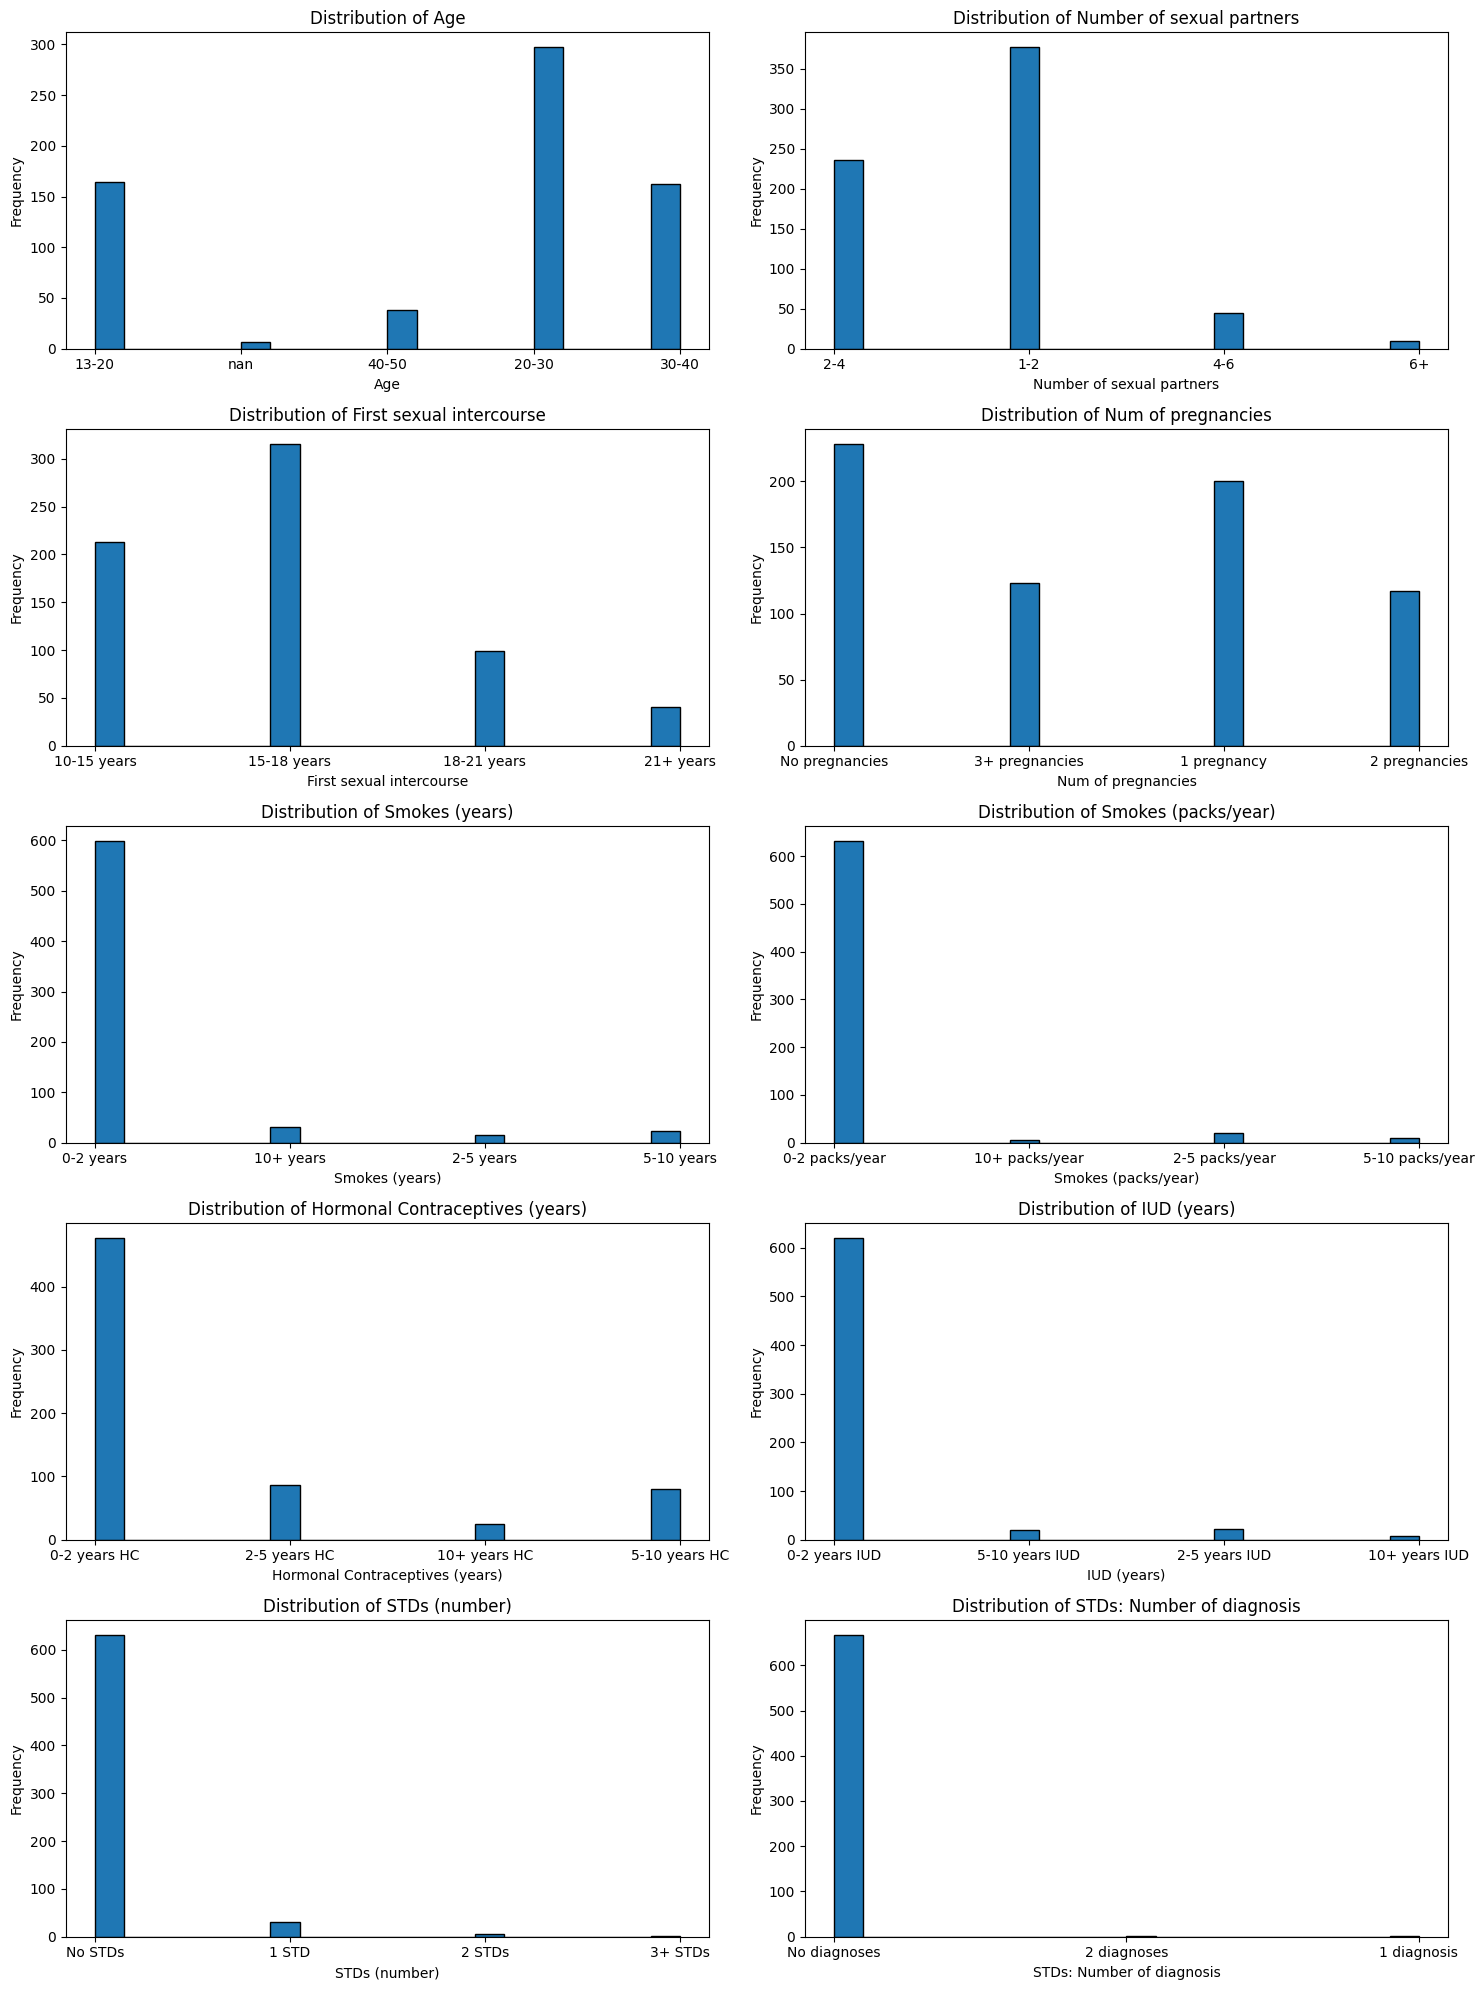

In [246]:
bins_dict = {
    "Age": ([13, 20, 30, 40, 50], ["13-20", "20-30", "30-40", "40-50"]),
    "Number of sexual partners": ([1, 2, 4, 6, np.inf], ["1-2", "2-4", "4-6", "6+"]),
    "First sexual intercourse": (
        [10, 15, 18, 21, np.inf],
        ["10-15 years", "15-18 years", "18-21 years", "21+ years"],
    ),
    "Num of pregnancies": (
        [0, 1, 2, 3, np.inf],
        ["No pregnancies", "1 pregnancy", "2 pregnancies", "3+ pregnancies"],
    ),
    "Smokes (years)": (
        [0, 2, 5, 10, np.inf],
        ["0-2 years", "2-5 years", "5-10 years", "10+ years"],
    ),
    "Smokes (packs/year)": (
        [0, 2, 5, 10, np.inf],
        ["0-2 packs/year", "2-5 packs/year", "5-10 packs/year", "10+ packs/year"],
    ),
    "Hormonal Contraceptives (years)": (
        [0, 2, 5, 10, np.inf],
        ["0-2 years HC", "2-5 years HC", "5-10 years HC", "10+ years HC"],
    ),
    "IUD (years)": (
        [0, 2, 5, 10, np.inf],
        ["0-2 years IUD", "2-5 years IUD", "5-10 years IUD", "10+ years IUD"],
    ),
    "STDs (number)": ([0, 1, 2, 3, np.inf], ["No STDs", "1 STD", "2 STDs", "3+ STDs"]),
    "STDs: Number of diagnosis": (
        [0, 1, 2, 3, np.inf],
        ["No diagnoses", "1 diagnosis", "2 diagnoses", "3+ diagnoses"],
    ),
}


# Function to manually discretize data based on custom bins and labels
def manual_discretize(data, bins_dict):
    discretized_data = data.copy()
    for col, (bins, labels) in bins_dict.items():
        discretized_data[col] = pd.cut(
            data[col], bins=bins, labels=labels, include_lowest=True
        )
    return discretized_data


# Apply manual discretization
discretized_data = manual_discretize(numerical_data, bins_dict)

# Combine with categorical data
discretized_data = pd.concat([discretized_data, categorical_data], axis=1)

discretized_data = discretized_data.applymap(str)
print(discretized_data.head())


frequency_tables = plot_histograms_and_get_frequencies(
    discretized_data, numerical_columns
)

The algorithm expects transactions to be in the form of a list of lists, where each list represents a transaction and contains the items in that transaction. We can convert our data to this format by using the `transactions` variable.

In [234]:
transactions =  []
for i in range(0, len(discretized_data)):
    transactions.append(
        [
            str(discretized_data.values[i, j])
            for j in range(0, discretized_data.shape[1])
        ]
    )
print(transactions)

[['13-20', '2-4', '10-15 years', 'No pregnancies', '0-2 years', '0-2 packs/year', '0-2 years HC', '0-2 years IUD', 'No STDs', 'No diagnoses', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0', '0', '0', '0', '0', '0', '0', '0'], ['13-20', '1-2', '10-15 years', 'No pregnancies', '0-2 years', '0-2 packs/year', '0-2 years HC', '0-2 years IUD', 'No STDs', 'No diagnoses', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0', '0', '0', '0', '0', '0', '0', '0'], ['nan', '4-6', '15-18 years', '3+ pregnancies', '10+ years', '10+ packs/year', '2-5 years HC', '0-2 years IUD', 'No STDs', 'No diagnoses', '1.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1', '0', '1', '0', '0', '0', '0', '0'], ['40-50', '2-4', '18-21 years', '3+ pregnancies', '0-2 years', '0-2 packs/year', '10+ years HC', '0-2 years IUD', 'No STDs', 'No diagnoses', '0.0', '1.0', '0.0',

Now, we can use the `apriori` function to find frequent itemsets in the data. We can specify the minimum support threshold using the `min_support` parameter. We can also specify the minimum and maximum length of the itemsets we are interested in using the `min_length` and `max_length` parameters.

Finally, we can use the `association_rules` function to generate rules based on the frequent itemsets. We can specify the metric we are interested in using the `metric` parameter. We can also specify the minimum threshold for the metric using the `min_threshold` parameter.

In [247]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = rules.sort_values(by="lift", ascending=False)
print(rules.head(10))


                                              antecedents  \
370081  (0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...   
337590                (13-20, 0-2 packs/year, No STDs, 0)   
379272              (0.0, 13-20, 0-2 packs/year, No STDs)   
310498                   (13-20, 0-2 packs/year, No STDs)   
379171           (13-20, No STDs, 0.0, 0, 0-2 packs/year)   
378820  (0-2 years, 0-2 years IUD, No diagnoses, 0.0, ...   
337403  (0-2 years, 0-2 years IUD, No diagnoses, 0, 0-...   
379275                (13-20, 0-2 packs/year, No STDs, 0)   
378923  (0-2 years, 0-2 years IUD, No diagnoses, 0.0, ...   
378924  (0-2 years, 0-2 years IUD, No diagnoses, 0, 0-...   

                                              consequents  antecedent support  \
370081              (0.0, 13-20, 0-2 packs/year, No STDs)            0.206587   
337590  (0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...            0.217066   
379272  (0-2 years, 0-2 years IUD, No diagnoses, 0, 0-...            0.217066   
3104

In [255]:
# Filter rules with high lift and moderate to high confidence
interesting_rules = rules[(rules["lift"] > 1.1) & (rules["confidence"] > 0.6)]
df = pd.DataFrame(interesting_rules)
df.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
370081,"(0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...","(0.0, 13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
378820,"(0-2 years, 0-2 years IUD, No diagnoses, 0.0, ...","(13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
337403,"(0-2 years, 0-2 years IUD, No diagnoses, 0, 0-...","(13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
378923,"(0-2 years, 0-2 years IUD, No diagnoses, 0.0, ...","(13-20, 0-2 packs/year, No STDs, 0)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
378924,"(0-2 years, 0-2 years IUD, No diagnoses, 0, 0-...","(0.0, 13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
379067,"(0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...","(13-20, No STDs, 0.0, 0, 0-2 packs/year)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
370017,"(0-2 years, 0-2 years IUD, No diagnoses, 0.0, ...","(13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
337467,"(0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...","(13-20, 0-2 packs/year, No STDs, 0)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
310405,"(0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...","(13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
132429,"(0-2 years, 0-2 years IUD, 10-15 years, 0-2 ye...","(13-20, 0-2 packs/year, 0)",0.209581,0.235030,0.133234,0.635714,2.704823,0.083976,2.099918,0.797412


In [256]:
# Filter rules with high leverage
high_leverage_rules = rules[rules["leverage"] > 0.02]
high_leverage_df = pd.DataFrame(high_leverage_rules)
high_leverage_df.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
370081,"(0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...","(0.0, 13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
337590,"(13-20, 0-2 packs/year, No STDs, 0)","(0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...",0.217066,0.206587,0.124251,0.572414,2.770815,0.079409,1.855563,0.816282
379272,"(0.0, 13-20, 0-2 packs/year, No STDs)","(0-2 years, 0-2 years IUD, No diagnoses, 0, 0-...",0.217066,0.206587,0.124251,0.572414,2.770815,0.079409,1.855563,0.816282
310498,"(13-20, 0-2 packs/year, No STDs)","(0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...",0.217066,0.206587,0.124251,0.572414,2.770815,0.079409,1.855563,0.816282
379171,"(13-20, No STDs, 0.0, 0, 0-2 packs/year)","(0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...",0.217066,0.206587,0.124251,0.572414,2.770815,0.079409,1.855563,0.816282
378820,"(0-2 years, 0-2 years IUD, No diagnoses, 0.0, ...","(13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
337403,"(0-2 years, 0-2 years IUD, No diagnoses, 0, 0-...","(13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
379275,"(13-20, 0-2 packs/year, No STDs, 0)","(0-2 years, 0-2 years IUD, No diagnoses, 0.0, ...",0.217066,0.206587,0.124251,0.572414,2.770815,0.079409,1.855563,0.816282
378923,"(0-2 years, 0-2 years IUD, No diagnoses, 0.0, ...","(13-20, 0-2 packs/year, No STDs, 0)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
378924,"(0-2 years, 0-2 years IUD, No diagnoses, 0, 0-...","(0.0, 13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501


In [258]:
# Filter rules with high conviction
high_conviction_rules = rules[rules["conviction"] > 1.5]
high_conviction_df = pd.DataFrame(high_conviction_rules)
high_conviction_df.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
370081,"(0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...","(0.0, 13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
337590,"(13-20, 0-2 packs/year, No STDs, 0)","(0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...",0.217066,0.206587,0.124251,0.572414,2.770815,0.079409,1.855563,0.816282
379272,"(0.0, 13-20, 0-2 packs/year, No STDs)","(0-2 years, 0-2 years IUD, No diagnoses, 0, 0-...",0.217066,0.206587,0.124251,0.572414,2.770815,0.079409,1.855563,0.816282
310498,"(13-20, 0-2 packs/year, No STDs)","(0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...",0.217066,0.206587,0.124251,0.572414,2.770815,0.079409,1.855563,0.816282
379171,"(13-20, No STDs, 0.0, 0, 0-2 packs/year)","(0-2 years, 0-2 years IUD, No diagnoses, 0-2 y...",0.217066,0.206587,0.124251,0.572414,2.770815,0.079409,1.855563,0.816282
378820,"(0-2 years, 0-2 years IUD, No diagnoses, 0.0, ...","(13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
337403,"(0-2 years, 0-2 years IUD, No diagnoses, 0, 0-...","(13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
379275,"(13-20, 0-2 packs/year, No STDs, 0)","(0-2 years, 0-2 years IUD, No diagnoses, 0.0, ...",0.217066,0.206587,0.124251,0.572414,2.770815,0.079409,1.855563,0.816282
378923,"(0-2 years, 0-2 years IUD, No diagnoses, 0.0, ...","(13-20, 0-2 packs/year, No STDs, 0)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501
378924,"(0-2 years, 0-2 years IUD, No diagnoses, 0, 0-...","(0.0, 13-20, 0-2 packs/year, No STDs)",0.206587,0.217066,0.124251,0.601449,2.770815,0.079409,1.964453,0.805501


#### Key Associations and Metrics

1. **Age Range (13-20)**:
   - **Antecedents**: individuals aged 13-20 are frequently part of the antecedents in many rules.
   - **Consequents**: This age group is commonly associated with having no STDs, no diagnoses, and using hormonal contraceptives or IUDs for short durations (0-2 years).
   - **Support**: The support for these rules is around 12.4%, indicating that these patterns are present in a significant portion of the dataset.
   - **Confidence**: The confidence values range from 57.24% to 60.14%, showing a moderate to high likelihood that the consequents occur given the antecedents.
   - **Lift**: The lift values are 2.77, indicating that the antecedents increase the likelihood of the consequents by 177%.
   - **Leverage**: A leverage of 0.079 suggests a substantial deviation from what would be expected if the antecedents and consequents were independent.
   - **Conviction**: Values ranging from 1.86 to 1.96 indicate a moderate to strong reliability of the rules.
   - **Zhang's Metric**: Values between 0.805 and 0.816 suggest a high level of interestingness and strength in these associations.

2. **No STDs and No Diagnoses**:
   - **Antecedents**: No STDs and no diagnoses are frequent in the antecedents of several rules.
   - **Consequents**: These conditions are strongly associated with short-term use of hormonal contraceptives or IUDs (0-2 years) in young individuals.
   - **Support**: The support for these rules is consistently around 12.4%, showing these patterns are common in the dataset.
   - **Confidence**: Confidence levels of 57.24% to 60.14% demonstrate a moderate to high probability that the consequents occur when the antecedents are present.
   - **Lift**: A lift of 2.77 highlights a strong positive correlation, suggesting the antecedents significantly increase the likelihood of the consequents.
   - **Leverage**: The leverage value of 0.079 confirms a substantial positive association.
   - **Conviction**: High conviction values (1.86 to 1.96) indicate the reliability of these rules.
   - **Zhang's Metric**: High values (0.805 to 0.816) further underscore the strength and interestingness of these rules.

3. **Short-Term Contraceptive Use (0-2 years)**:
   - **Antecedents**: Short-term use of hormonal contraceptives or IUDs (0-2 years) is frequently seen in the antecedents.
   - **Consequents**: This is strongly associated with young individuals aged 13-20, who have no STDs and no diagnoses.
   - **Support**: These rules have a support of around 12.4%, indicating their prevalence in the dataset.
   - **Confidence**: Confidence values between 57.24% and 60.14% show a moderate to high likelihood that the consequents occur given the antecedents.
   - **Lift**: The consistent lift of 2.77 signifies that the antecedents considerably increase the probability of the consequents.
   - **Leverage**: A leverage of 0.079 indicates a strong association beyond what is expected by chance.
   - **Conviction**: Conviction values of 1.86 to 1.96 confirm the rules' reliability.
   - **Zhang's Metric**: The high Zhang's Metric values (0.805 to 0.816) indicate the interestingness and strength of these associations.

### Practical Implications

1. **Healthcare and Contraceptive Use**:
   - The insights suggest that younger individuals (aged 13-20) are more likely to use hormonal contraceptives or IUDs for shorter durations and have fewer STDs or diagnoses.
   - **Support**: A high support of around 12.4% indicates these patterns are prevalent, highlighting the need for targeted health interventions.
   - **Confidence**: Moderate to high confidence values (57.24% to 60.14%) suggest that these associations are reliable and actionable.
   - **Lift**: A lift of 2.77 demonstrates that these associations are significantly stronger than what would be expected by chance.
   - **Leverage**: The leverage value of 0.079 confirms the substantial positive correlation.
   - **Conviction**: High conviction values (1.86 to 1.96) emphasize the reliability of these findings.

2. **Targeted Health Interventions**:
   - These insights can guide the design of targeted health interventions and educational programs for younger individuals to promote safe and informed contraceptive use and STD prevention.
   - **Support**: The high support values ensure that these interventions are relevant to a large portion of the population.
   - **Confidence**: The reliable confidence levels indicate that these interventions are likely to be effective.
   - **Lift**: The strong lift values suggest that focusing on these associations can lead to significant improvements in health outcomes.
   - **Leverage**: The leverage values highlight the impact of these interventions.
   - **Conviction**: The high conviction values underline the necessity and effectiveness of these targeted programs.

> **Note**: Importantly, this analysis did not require the removal of any variables.